In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
gen = [glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset4/real/*.*')]

forg = [glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('/content/drive/MyDrive/handwritten d/archive/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [8]:
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

In [9]:
gen_imgs = load_images(gen)
forg_imgs = load_images(forg)

In [10]:

num_gen = sum([len(x) for x in gen])
num_forg = sum([len(x) for x in forg])
print(f"Number of real signatures: {num_gen}")
print(f"Number of forged signatures: {num_forg}")

Number of real signatures: 270
Number of forged signatures: 360


In [11]:
if num_gen == num_forg:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

The dataset is not balanced.


In [12]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print("Shape of real images: ", gen_shape[:5])
print("Shape of forged images: ", forg_shape[:5])

gen_color = [x.shape[2] for x in gen_imgs]
forg_color = [x.shape[2] for x in forg_imgs]
print("Color channels of real images: ", gen_color[:5])
print("Color channels of forged images: ", forg_color[:5])

gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]
print("Mean pixel values of real images: ", gen_pixels[:5])
print("Mean pixel values of forged images: ", forg_pixels[:5])

Shape of real images:  [(84, 214, 3), (64, 318, 3), (73, 225, 3), (92, 251, 3), (104, 230, 3)]
Shape of forged images:  [(83, 166, 3), (91, 171, 3), (107, 219, 3), (83, 158, 3), (76, 163, 3)]
Color channels of real images:  [3, 3, 3, 3, 3]
Color channels of forged images:  [3, 3, 3, 3, 3]
Mean pixel values of real images:  [242.29704420709095, 244.67162932389937, 242.98703196347032, 243.10245972631213, 243.31145484949832]
Mean pixel values of forged images:  [243.47038757439395, 242.56393119551015, 242.3933910866442, 239.7224086218291, 243.78912388332796]


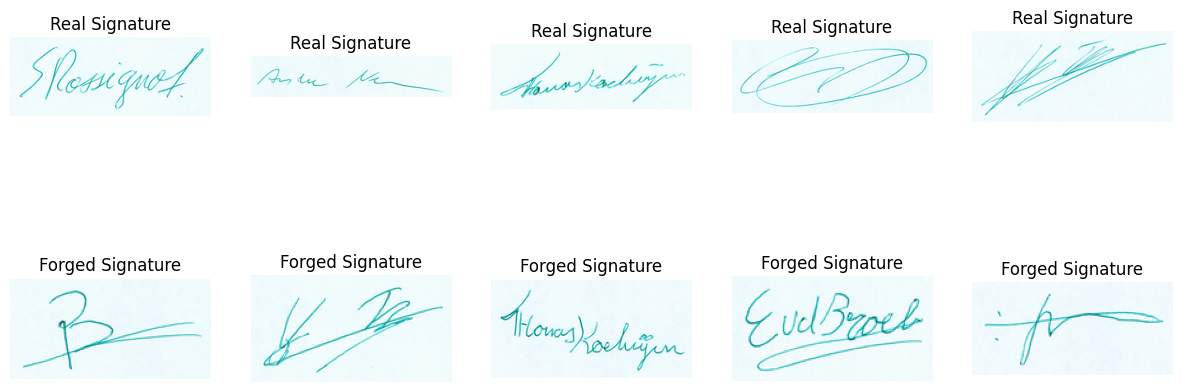

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axs[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title("Real Signature")
    axs[0, i].axis("off")

    axs[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title("Forged Signature")
    axs[1, i].axis("off")

plt.show()

In [14]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])


In [15]:
for i in range(len(gen_shape)):
    image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)

<ipython-input-15-c01f5b6b03a0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)
<ipython-input-15-c01f5b6b03a0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)
<ipython-input-15-c01f5b6b03a0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)
<ipython-input-15-c

In [16]:
for i in range(len(forg_shape)):
    image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)

<ipython-input-16-fe0d143c368c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)
<ipython-input-16-fe0d143c368c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)
<ipython-input-16-fe0d143c368c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)
<

In [17]:
print(image_data.describe())

       Mean Pixel Value
count        630.000000
mean         243.707944
std            5.005948
min          231.164579
25%          240.433114
50%          243.039865
75%          248.727406
max          252.423212


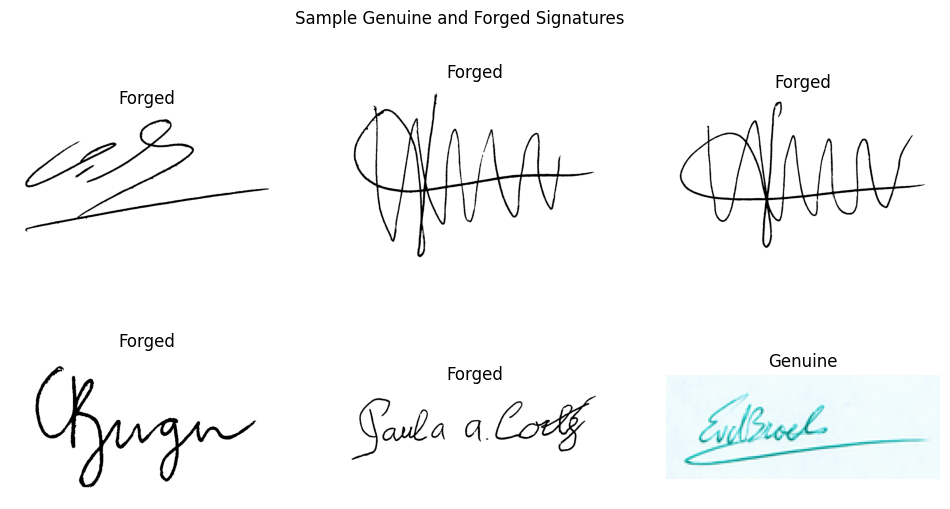

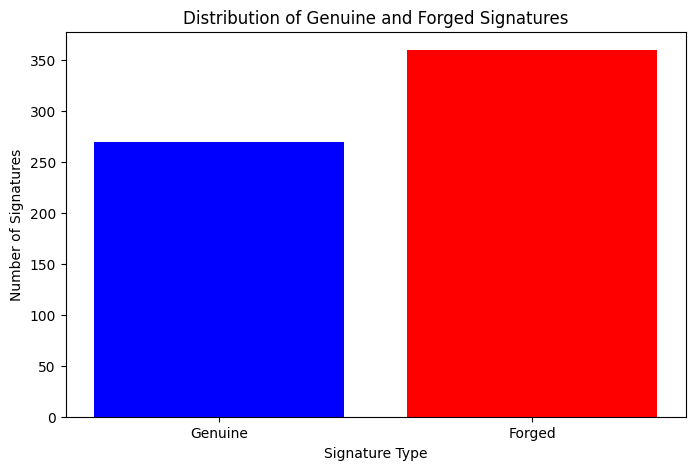

In [22]:
# Visualize a few random genuine and forged signatures
def plot_images(images, labels, title):
    plt.figure(figsize=(12, 6))
    for i in range(6):  # Display the first 6 images
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Randomly select genuine and forged signatures for visualization
import random

random.seed(42)  # Set a seed for reproducibility
gen_labels = ['Genuine' for _ in range(num_gen)]
forg_labels = ['Forged' for _ in range(num_forg)]

# Combine genuine and forged signatures into one list for visualization
all_images = gen_imgs + forg_imgs
all_labels = gen_labels + forg_labels

# Shuffle the data for randomness
combined_data = list(zip(all_images, all_labels))
random.shuffle(combined_data)
all_images, all_labels = zip(*combined_data)

# Visualize a sample of genuine and forged signatures
plot_images(all_images, all_labels, "Sample Genuine and Forged Signatures")

# Plot a bar chart to show the distribution of genuine and forged signatures
plt.figure(figsize=(8, 5))
plt.bar(["Genuine", "Forged"], [num_gen, num_forg], color=['blue', 'red'])
plt.title("Distribution of Genuine and Forged Signatures")
plt.xlabel("Signature Type")
plt.ylabel("Number of Signatures")
plt.show()


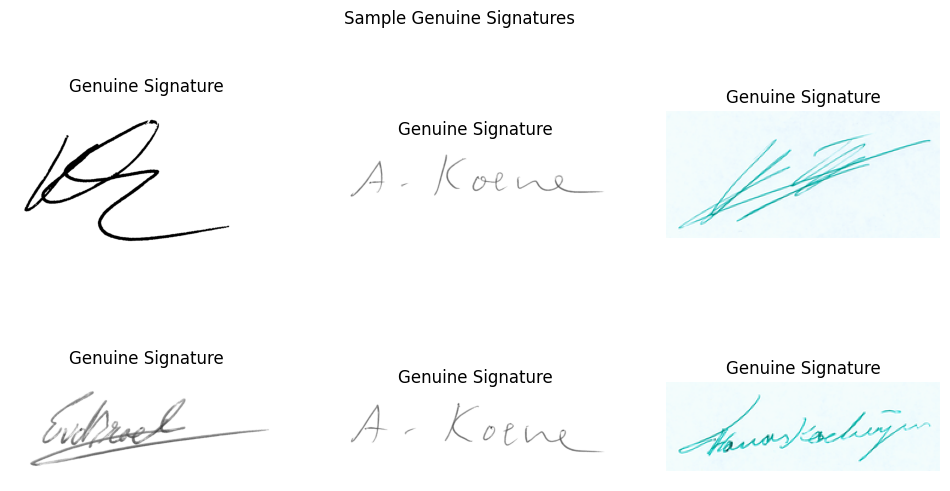

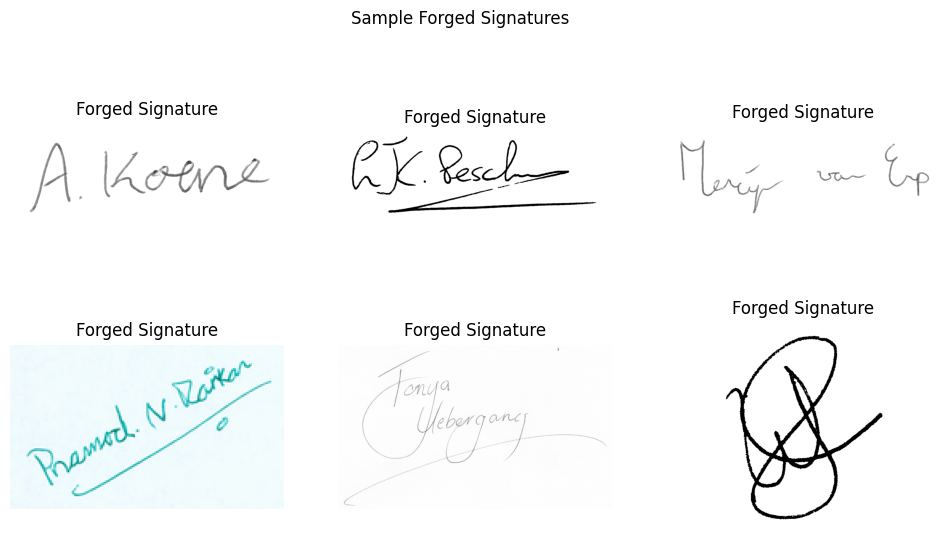

In [24]:
# Display sample genuine and forged signatures separately
def plot_sample_images_by_type(images, labels, signature_type, num_samples=6):
    plt.figure(figsize=(12, 6))
    selected_images = [img for img, label in zip(images, labels) if label == signature_type]
    random_samples = random.sample(selected_images, num_samples)

    for i, img in enumerate(random_samples):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"{signature_type} Signature")
        plt.axis('off')
    plt.suptitle(f"Sample {signature_type} Signatures")
    plt.show()

# Display sample genuine and forged signatures
plot_sample_images_by_type(all_images, all_labels, "Genuine", num_samples=6)
plot_sample_images_by_type(all_images, all_labels, "Forged", num_samples=6)



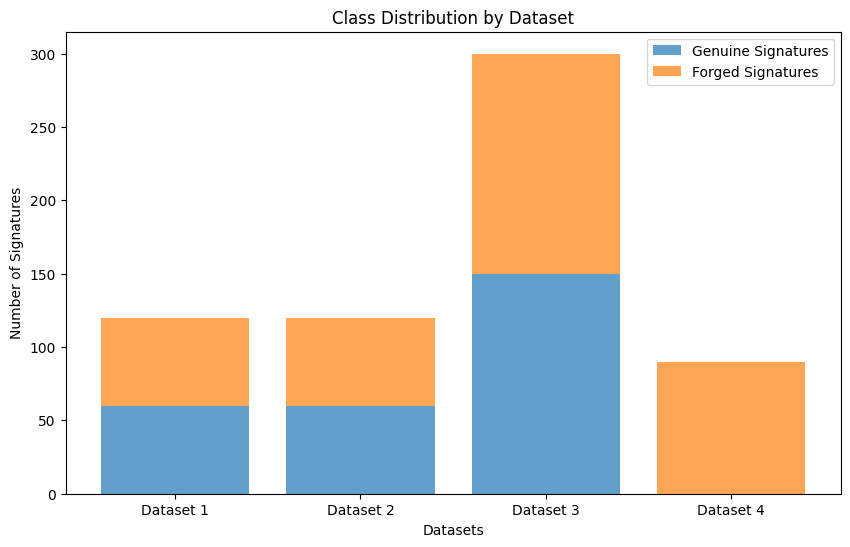

In [25]:
import matplotlib.pyplot as plt

dataset_labels = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]
num_genuine = [len(gen[i]) for i in range(len(gen))]
num_forged = [len(forg[i]) for i in range(len(forg))]

plt.figure(figsize=(10, 6))
plt.bar(dataset_labels, num_genuine, label='Genuine Signatures', alpha=0.7)
plt.bar(dataset_labels, num_forged, bottom=num_genuine, label='Forged Signatures', alpha=0.7)
plt.xlabel('Datasets')
plt.ylabel('Number of Signatures')
plt.title('Class Distribution by Dataset')
plt.legend()
plt.show()

In [28]:
import os

def check_file_types(file_list):
    file_types = set()
    for files in file_list:
        for file in files:
            file_extension = os.path.splitext(file)[1]
            file_types.add(file_extension)
    return file_types

gen_file_types = check_file_types(gen)
forg_file_types = check_file_types(forg)

print("File extensions/types in genuine signatures:")
print(gen_file_types)
print("File extensions/types in forged signatures:")
print(forg_file_types)

File extensions/types in genuine signatures:
{'.png'}
File extensions/types in forged signatures:
{'.png'}


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7808      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 8138 (31.79 KB)
Trainable params: 8138 (31.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 19s 11ms/step - loss: 0.8022 - accuracy: 0.7395 - val_loss: 0.3410 - val_accuracy: 0.8995
Epoch 2/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2692 - accuracy: 0.9191 - val_loss: 0.1907 - val_accuracy: 0.9414
Epoch 3/5
1500/1500 [==============================] - 15s 10ms

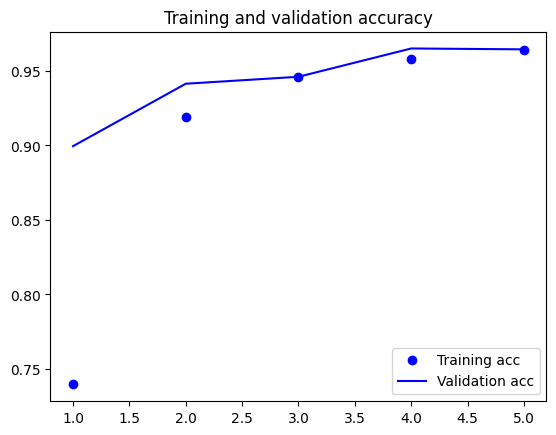

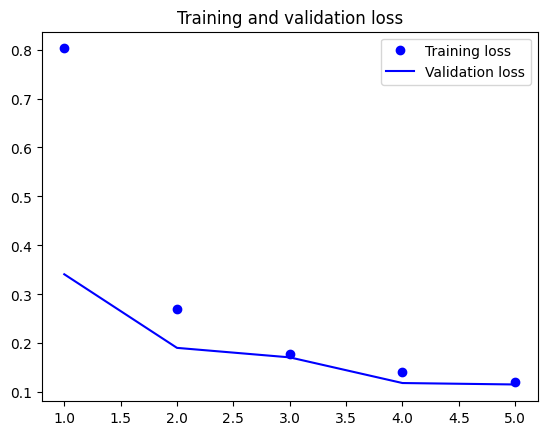

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2] * 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2] * 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.LSTM(32, input_shape=(train_data.shape[1], train_data.shape[2])),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=32, epochs=5, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

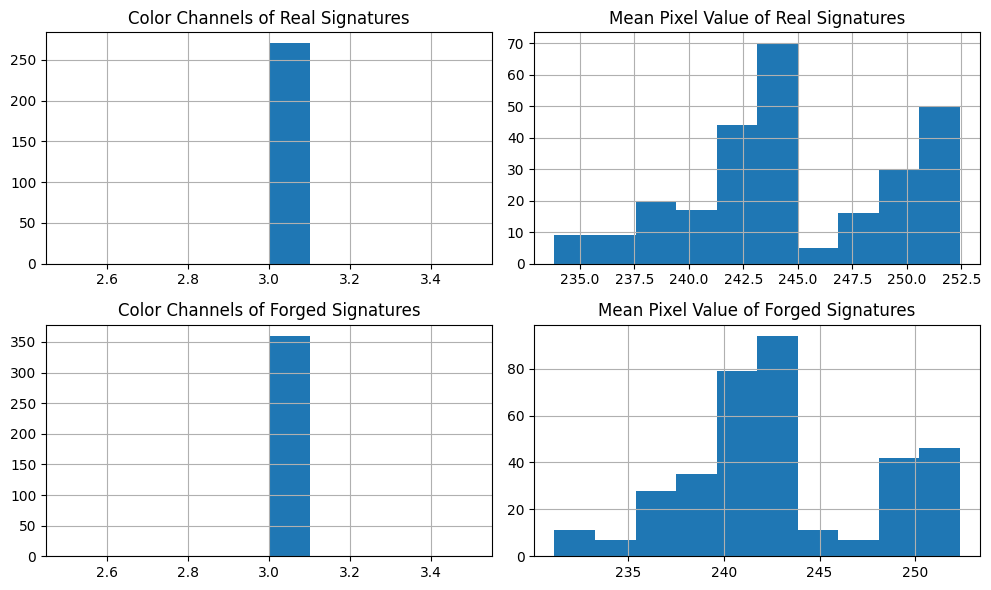

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
image_data[image_data['Type'] == 'Real']['Color Channels'].hist(ax=axs[0, 0])
image_data[image_data['Type'] == 'Forged']['Color Channels'].hist(ax=axs[1, 0])
image_data[image_data['Type'] == 'Real']['Mean Pixel Value'].hist(ax=axs[0, 1])
image_data[image_data['Type'] == 'Forged']['Mean Pixel Value'].hist(ax=axs[1, 1])

axs[0, 0].set_title("Color Channels of Real Signatures")
axs[0, 1].set_title("Mean Pixel Value of Real Signatures")
axs[1, 0].set_title("Color Channels of Forged Signatures")
axs[1, 1].set_title("Mean Pixel Value of Forged Signatures")

plt.tight_layout()
plt.show()

In [20]:
history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

Epoch 1/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1045 - accuracy: 0.9679 - val_loss: 0.1285 - val_accuracy: 0.9606
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0944 - accuracy: 0.9714 - val_loss: 0.0895 - val_accuracy: 0.9743
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0854 - accuracy: 0.9739 - val_loss: 0.0800 - val_accuracy: 0.9763
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0774 - accuracy: 0.9772 - val_loss: 0.1039 - val_accuracy: 0.9703
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.0819 - val_accuracy: 0.9771
Epoch 6/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0667 - accuracy: 0.9793 - val_loss: 0.0721 - val_accuracy: 0.9793
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0629 - accuracy: 0.9812 - val_loss: 0.0719 -

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Make predictions on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Compute and print the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)


313/313 [==============================] - 2s 4ms/step
Confusion Matrix:
[[ 968    0    1    0    1    1    4    1    4    0]
 [   0 1127    0    0    1    2    2    0    3    0]
 [   1    7 1009    2    1    1    2    4    5    0]
 [   0    1    7  982    0   10    0    4    6    0]
 [   2    0    0    0  951    0    5    5    8   11]
 [   0    2    0    4    0  881    1    1    3    0]
 [   4    2    1    0    1    6  942    0    2    0]
 [   0   18    8    4    0    0    0  987    7    4]
 [   2    1    2    0    0    4    2    0  963    0]
 [   1    3    0   10    9   12    0    4   22  948]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.99      0.97    